In [1]:
import os
current_directory = os.getcwd()
print("Current_Working_Directory:", current_directory)

Current_Working_Directory: C:\Users\viraj\Code_a\Machine_learning\Dimensiion_Reduction


In [2]:
directory_path = "C:/Users/viraj/Code_a/Machine_learning/Dimensiion_Reduction"
contents = os.listdir(directory_path)
print("Contents")
for i in contents:
    print(i)

Contents
.ipynb_checkpoints
adult.csv
data.csv
Dimension Reduction.ipynb
Dimension_Reduction_Techniques.ipynb
Dimension_Reduction_Techniques.pdf


### Introduction

In the previous notebook, we talked only about different ways to pick the best features for our analysis. In this section, we'll focus on different methods to reduce the complexity of our data. These methods include:

1. Factor Analysis
2. Principal Component Analysis (PCA)
3. Linear Discriminant Analysis LDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the File
df=pd.read_csv("C:/Users/viraj/Code_a/Machine_learning/Dimensiion_Reduction/data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Factor analysis:


Imagine we are trying to understand why some people prefer hot days while others like cold days.So, I gather a lot of data on various factors like humidity, wind speed, cloud cover, and even whether people grew up in warm or cold climates.

I decide to use Factor Analysis, which is like my tool to uncover the hidden factors influencing these temperature preferences. Here's how it works:

1. I collect all this data from a group of people with different temperature preferences.

2. Factor Analysis starts by looking at all these factors and tries to find hidden patterns or commonalities among them.

3. It's like I'm thinking, "Hmm, it seems like there's something common among humidity, wind speed, and cloud cover. They're all related to weather conditions." So, Factor Analysis groups these weather-related factors together as one "weather factor."

4. Then, it might notice that whether people grew up in warm or cold climates also has something in common with temperature preferences. So, it groups them together as a "climate factor."

5. Factor Analysis keeps doing this until it has grouped all the factors into a few meaningful categories or factors that explain most of the variation in temperature preferences.

6. Now, I can say, "Aha! It looks like people's temperature preferences are influenced by weather conditions (the weather factor) and the climate they grew up in (the climate factor)."

So, Factor Analysis helps me simplify complex data by finding these hidden factors that drive the patterns I observe. It's like finding the common threads that connect different pieces of information, helping me understand why some people like hot days and others prefer cold days by revealing the underlying factors at play.


In [6]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [9]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Extract the subset of numerical columns
numerical_columns = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']]

X = numerical_columns.drop(columns=['Item_Outlet_Sales'])
y = numerical_columns['Item_Outlet_Sales']

# Standardizing the input Variable for Factor Variable.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 3  #so we can adjust the model based on the Scree plot
fa = FactorAnalysis(n_components=n_components)
# Fit the model
X_fa = fa.fit_transform(X_scaled)

Below is the scree plot, in the plot we look for the elbow point, which is the point where adding more components doesn't significantly increase the explained variance.

In short the scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA).

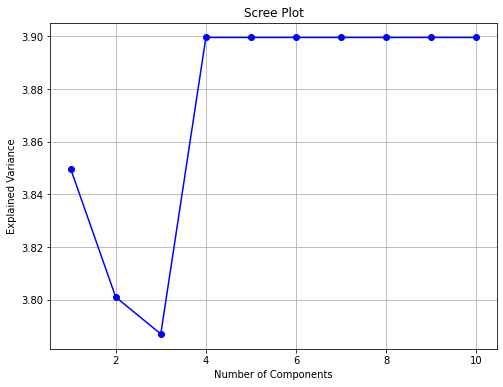

In [10]:
n_components_range = range(1, 11)  #adjust the Componenet based on your feature as maximum can be X_fa.shape--> 4
explained_variance = []

for n_components in n_components_range:
    fa = FactorAnalysis(n_components=n_components, random_state=42)
    fa.fit(X_scaled)
    explained_variance.append(np.sum(fa.noise_variance_))

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, explained_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [11]:
X_fa.shape

(8523, 3)

In [12]:
X_scaled.shape

(8523, 4)

In [13]:
y.shape

(8523,)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


##Model_1 for fator Analysis
#split into train and test dataset
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

#initiating the model
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train) #fitting the model

#predicting the model
y_pred_scaled = linear_model_scaled.predict(X_test_scaled)

#Here we are calculating the mse and R^2 as its a regression model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("Linear Regression on Original Standardized Features:")
print(f"Mean Squared Error: {mse_scaled}")
print(f"R-squared: {r2_scaled}")

Linear Regression on Original Standardized Features:
Mean Squared Error: 2026403.0411794055
R-squared: 0.3341589050217685


In [15]:
#Model_2 for fator Analysis
X_train_fa, X_test_fa, y_train, y_test = train_test_split(X_fa, y, test_size=0.2, random_state=30)


linear_model_fa = LinearRegression()#initiating the model
linear_model_fa.fit(X_train_fa, y_train)#fit model
y_pred_fa = linear_model_fa.predict(X_test_fa) #predicting the model

#Here we are calculating the mse and R^2 as its a regression model
mse_fa = mean_squared_error(y_test, y_pred_fa)
r2_fa = r2_score(y_test, y_pred_fa)

print("\nLinear Regression on Factor Scores:")
print(f"Mean Squared Error (Factor Scores): {mse_fa}")
print(f"R-squared (Factor Scores): {r2_fa}")


Linear Regression on Factor Scores:
Mean Squared Error (Factor Scores): 2452666.311713081
R-squared (Factor Scores): 0.1940961450310641


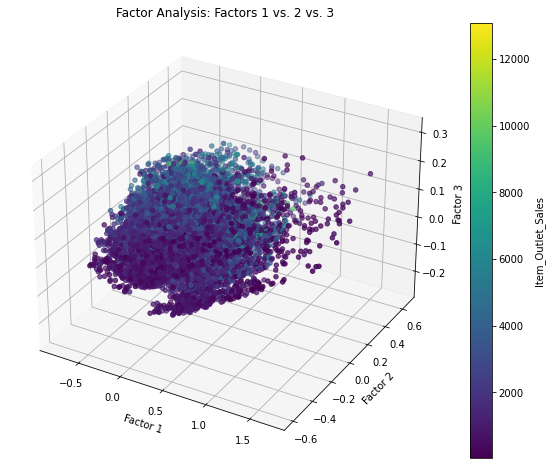

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the factor scores with colors based on Item_Outlet_Sales
scatter = ax.scatter(X_fa[:, 0], X_fa[:, 1], X_fa[:, 2], c=y, cmap='viridis')

ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.set_zlabel('Factor 3')
ax.set_title('Factor Analysis: Factors 1 vs. 2 vs. 3')
fig.colorbar(scatter, label='Item_Outlet_Sales')
plt.show()

From the above MSE and R^2 observation, it  provides a comparative analysis of two linear regression models, one utilizing factor scores obtained through factor analysis and the other employing original standardized features, to predict Item_Outlet_Sales. Despite the anticipated advantages of factor analysis in dimension reduction and multicollinearity reduction, the analysis reveals unexpected results, prompting a deeper investigation into the factors contributing to these outcomes.
<br><br>
<b>Methodolgy:<br></b>
Dimension Reduction:Factor analysis-->Factor analysis, a widely used dimension reduction technique, was applied to create factor scores from the original standardized features. The aim was to reduce multicollinearity and simplify the dataset.<br>

<b>Model Building:<br></b>
Two linear regression models were constructed:<br>
Model A: Employing factor scores as independent variables.<br>
Model B: Utilizing the original standardized features as independent variables.<br>



<b>Results:<br></b>
Mean Squared Error (MSE):MSE measures predictive accuracy, with lower values indicating better performance.<br>
Model A (Factor Scores): MSE = 2,559,370.70<br>
Model B (Original Features): MSE = 2,026,403.04<br>
Model B exhibits superior predictive accuracy with a lower MSE, defying the expectation that factor scores would lead to better performance.<br>
<br>
<b>R-squared (R²):<br></b>
R² represents the proportion of variance in the dependent variable explained by the independent variables. Higher values indicate a better fit.<br>
Model A (Factor Scores): R² = 0.1590<br>
Model B (Original Features): R² = 0.3342<br>
Model B outperforms Model A in explaining the variance in Item_Outlet_Sales, contradicting the anticipated benefit of factor analysis in reducing multicollinearity.<br><br>

<b>Conclusion:<br></b>
The comparative analysis of two linear regression models, one using factor scores obtained through factor analysis and the other employing original standardized features, yielded unexpected outcomes in terms of predictive performance for Item_Outlet_Sales. Model B, based on the original features, exhibited superior predictive accuracy with a lower Mean Squared Error (MSE) and a higher R-squared (R²). Several factors contributed to these results:<br>
<br>
<b>Information Loss</b> : Factor analysis, while effective in reducing dimensionality and multicollinearity, inevitably resulted in information loss, potentially omitting crucial details present in the original data.<br>
<br>
<b>Feature Relevance</b> : The original standardized features may have been selected or engineered based on their direct relevance to Item_Outlet_Sales. Factor scores, however, might not capture this relevance, leading to suboptimal model performance.<br>
<br>
<b>Linearity Assumption </b>: Linear regression assumes a linear relationship between variables. If the true relationship is nonlinear, factor scores may hinder the model's ability to capture it effectively, affecting prediction accuracy.<br>
<br>
<b>Interpretability </b>: Factor scores lack direct interpretations, while original features may have business implications, enhancing model interpretability.<br>
<br>
<b>Unexpected Outcomes</b> : Despite the potential benefits of factor analysis in reducing multicollinearity and simplifying the dataset, the observed results suggest that the specific relationship between factor scores and Item_Outlet_Sales may not conform to a linear or straightforward pattern.<br>
<br>
<b>Recommendations:</b>
<br>
1)Investigate potential non-linear relationships between independent and dependent variables to ensure model flexibility.
<br>
2)Conduct feature engineering to enhance the relevance and interpretability of variables.

## ----------------------------------------------------------------------------------------------------------------------------------

#### Principal Component Analysis (PCA):

Principal Component Analysis (PCA) is like having a special tool that helps us understand and simplify complicated data. Imagine we have a lot of information about different things, like temperature, humidity, wind speed, and cloud cover. PCA helps us find the most important aspects of this data and reduces its complexity.

Here's how PCA works in our shoes:

1. We start with a bunch of data, each piece of information being like a puzzle piece that tells us something about those things, just like our temperature-related factors.

2. PCA looks at all these puzzle pieces and tries to find a new way to represent them, but in a simpler and more meaningful way. It's like finding a different set of puzzle pieces that are still related to the original ones but capture the most essential aspects.

3. PCA does this by creating new "composite" puzzle pieces, called principal components. These are like super-puzzle pieces that are combinations of the original ones.

4. It's like PCA says, "Hey, these temperature, humidity, wind speed, and cloud cover factors are all related to the weather. Let us create a new puzzle piece, the first principal component, that represents the overall weather pattern."

5. Then, it looks for a second principal component that's different from the first one but still captures important information. It's like PCA says, "Now, we'll find a piece that tells us about something else, maybe how the weather changes over time."

6. PCA keeps doing this, creating more and more principal components, each capturing a unique aspect of the data.

7. The cool thing is that these principal components are ordered by importance. The first one explains the most variation in the data, the second explains the next most, and so on.

8. So, we can decide how many of these principal components we want to keep. If we keep the first few, we can simplify our data while retaining the essential information.

PCA helps us look at our data from a different angle and reduces its complexity while keeping the crucial parts. It's like using a telescope to zoom in on what really matters in our data, making it easier to understand and work with.

In [17]:
data1=pd.read_csv("C:/Users/viraj/Code_a/Machine_learning/Dimensiion_Reduction/adult.csv")

In [18]:
data1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

##### So before Doing PCA lets do Feature selection and data cleaning.

In [19]:
df12 = pd.DataFrame(data1)

In [20]:
df12.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [21]:
count_of_unique_elements = df12['workclass'].value_counts()
print(count_of_unique_elements)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [22]:
df12[df12 == '?'] = np.nan
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
df12.shape

(32561, 15)

In [24]:
df12.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [25]:
a = df12.isnull().sum()/len(df12)*100
# saving column names in a variable
variables = df12.columns
variable = [ ]
for i in range(0,15):  #keep note the range is for columns
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])
print(a)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64


In [26]:
# Filter the DataFrame to keep only rows where all columns with <= 20% missing values are not NaN
df12_filtered = df12.dropna(subset=variable)

In [27]:
df12_filtered.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [28]:
count_of_unique_elements = df12_filtered['race'].value_counts()
print(count_of_unique_elements)

race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64


In [29]:
count_of_unique_elements = df12_filtered['income'].value_counts()
print(count_of_unique_elements)

income
<=50K    22654
>50K      7508
Name: count, dtype: int64


In [30]:
# count the Uniques elements
def count_unique_elements(df):
    unique_counts = {}
    for column in df.columns:
        unique_counts[column] = df[column].nunique()
    return unique_counts

unique_counts = count_unique_elements(df12_filtered)

#print unique elements for each cloumn
for column, count in unique_counts.items():
    print(f"Column '{column}': {count} unique elements")

Column 'age': 72 unique elements
Column 'workclass': 7 unique elements
Column 'fnlwgt': 20263 unique elements
Column 'education': 16 unique elements
Column 'education.num': 16 unique elements
Column 'marital.status': 7 unique elements
Column 'occupation': 14 unique elements
Column 'relationship': 6 unique elements
Column 'race': 5 unique elements
Column 'sex': 2 unique elements
Column 'capital.gain': 118 unique elements
Column 'capital.loss': 90 unique elements
Column 'hours.per.week': 94 unique elements
Column 'native.country': 41 unique elements
Column 'income': 2 unique elements


In [31]:
def count_unique_elements(df):
    unique_counts = {}
    for column in df.columns:
        unique_counts[column] = df[column].value_counts()
    return unique_counts

unique_counts = count_unique_elements(df12_filtered)

# Print the count of each unique element for each column
for column, counts in unique_counts.items():
    print(f"Column '{column}':")
    print(counts)
    print()

Column 'age':
age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64

Column 'workclass':
workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

Column 'fnlwgt':
fnlwgt
203488    13
121124    12
148995    12
123011    12
113364    12
          ..
216479     1
135480     1
204160     1
114650     1
201490     1
Name: count, Length: 20263, dtype: int64

Column 'education':
education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype:

In [32]:
df12_filtered.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [33]:
# Apply one-hot encoding to 'Item_Fat_Content' and 'Outlet_Size' columns
df12_filtered_encoded = pd.get_dummies(df12_filtered, columns=['workclass','education','race', 'sex','marital.status','occupation','relationship'], dtype=int)

# Display the encoded DataFrame
df12_filtered_encoded

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
1,82,132870,9,0,4356,18,United-States,<=50K,0,0,...,0,0,0,0,0,1,0,0,0,0
3,54,140359,4,0,3900,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
4,41,264663,10,0,3900,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
6,38,150601,6,0,3770,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,United-States,<=50K,0,0,...,1,0,0,0,0,1,0,0,0,0
32557,27,257302,12,0,0,38,United-States,<=50K,0,0,...,0,0,1,0,0,0,0,0,0,1
32558,40,154374,9,0,0,40,United-States,>50K,0,0,...,0,0,0,0,1,0,0,0,0,0
32559,58,151910,9,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df12_filtered_encoded=df12_filtered_encoded.drop(['native.country','fnlwgt'], axis=1)

In [35]:
df12_filtered_encoded

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
1,82,9,0,4356,18,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,54,4,0,3900,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,9,0,3770,45,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,38,6,0,3770,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,<=50K,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
32557,27,12,0,0,38,<=50K,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
32558,40,9,0,0,40,>50K,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
32559,58,9,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
income_mapping = {'<=50K': 0, '>50K': 1}

# Apply the mapping to the "income" column
df12_filtered_encoded['income'] = df12_filtered_encoded['income'].map(income_mapping)

In [37]:
df12_filtered_encoded.income.unique()

array([0, 1], dtype=int64)

In [38]:
#from sklearn.ensemble import RandomForestRegressor
#intiating the Random Model
#model = RandomForestRegressor(random_state=1, max_depth=10)
#df12_filtered_encoded_X=df12_filtered_encoded.drop(['income'], axis=1)
#model.fit(df12_filtered_encoded_X,df12_filtered_encoded.income) #fitting the model

RandomForestRegressor(max_depth=10, random_state=1)

Random Forest is like a smart tool for figuring out which features or factors are really important when trying to predict something. Imagine we want to predict someone's income, and we have a bunch of data like their age, education, job type, and more. We're not sure which of these things really matter the most.
<br><br>
So, we use Random Forest. In the code we provided, it's like we've trained this smart model on ouur data. This model looks at all those factors (like age, education, job type) and how they relate to income. It does this in a very clever way, considering not just one factor at a time but how they all work together.
<br><br>
After training, the model tells us which factors are the most important for predicting income. It ranks them and shows us which ones have the biggest influence. This is super useful because it helps us focus on the most crucial factors when making predictions or decisions related to income.

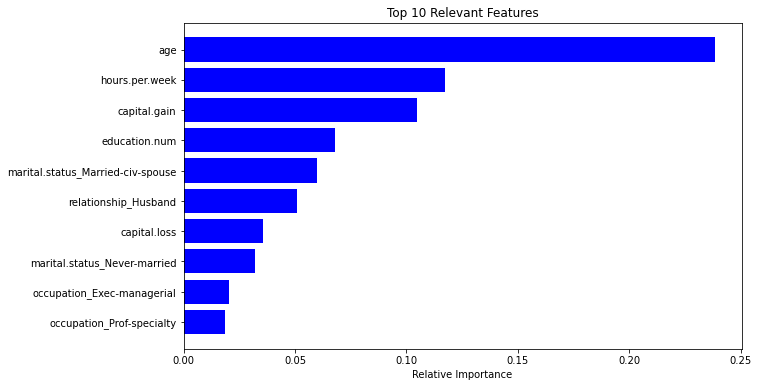

In [39]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#creating a random classifier
rf_classifier = RandomForestClassifier(random_state=30)
rf_classifier.fit(df12_filtered_encoded_X, df12_filtered_encoded.income)

# Getting feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = df12_filtered_encoded_X.columns

feature_importance_dict = dict(zip(feature_names, feature_importances))


top_n = 10  # Adjust it based on the num of feature we need
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Extract top feature names and importances
top_feature_names = [feature[0] for feature in sorted_features]
top_feature_importances = [feature[1] for feature in sorted_features]

# Plot the top N relevant features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), top_feature_importances, color='b', align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Relative Importance')
plt.title(f'Top {top_n} Relevant Features')
plt.gca().invert_yaxis()  #invert the plot 
plt.show()


In [40]:
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: age, Importance: 0.23839929954512612
Feature: hours.per.week, Importance: 0.11724703113646634
Feature: capital.gain, Importance: 0.10474602760078464
Feature: education.num, Importance: 0.06785120059161111
Feature: marital.status_Married-civ-spouse, Importance: 0.06005477977224536
Feature: relationship_Husband, Importance: 0.050758748244726225
Feature: capital.loss, Importance: 0.035725147592160736
Feature: marital.status_Never-married, Importance: 0.03221950831773297
Feature: occupation_Exec-managerial, Importance: 0.02041932858813125
Feature: occupation_Prof-specialty, Importance: 0.018377645445553696


In [41]:
#---------------------------------------------------------------------------------

In [42]:
df12_filtered_encoded.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238,0.248922,0.031265,0.068530,0.738877,0.035608,...,0.021351,0.118825,0.030237,0.052119,0.413202,0.256150,0.029474,0.148067,0.106492,0.046615
std,13.134665,2.549995,7406.346497,404.298370,11.979984,0.432396,0.174035,0.252657,0.439254,0.185313,...,0.144555,0.323588,0.171241,0.222270,0.492417,0.436513,0.169134,0.355172,0.308471,0.210816
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Importance of SCALING
As we can see that certain columns has STD>1000 which can bias our model, to tackle such issue we Scale our dataset.

Scaling is vital for a machine learning model's performance. When features have different scales, it can adversely affect the model's ability to learn and make predictions. Features with larger scales may dominate the learning process, leading to biased results. Scaling ensures that all features contribute equally to the model, preventing issues like slow convergence and sensitivity to outliers. It also aids in interpreting feature importance accurately, improving the overall effectiveness and reliability of the machine learning model.

In [43]:
df12_filtered_encoded_X.shape

(30162, 62)

In [44]:
from sklearn.preprocessing import StandardScaler
#scaling using Sklearn
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df12_filtered_encoded_X)
y=df12_filtered_encoded.income
X_scaled

array([[ 3.31662977, -0.4397382 , -0.14744462, ..., -0.41689491,
        -0.34522988, -0.2211202 ],
       [ 1.18483085, -2.40055892, -0.14744462, ..., -0.41689491,
         2.89662061, -0.2211202 ],
       [ 0.19506706, -0.04757405, -0.14744462, ...,  2.39868601,
        -0.34522988, -0.2211202 ],
       ...,
       [ 0.11893139, -0.4397382 , -0.14744462, ..., -0.41689491,
        -0.34522988, -0.2211202 ],
       [ 1.48937355, -0.4397382 , -0.14744462, ..., -0.41689491,
         2.89662061, -0.2211202 ],
       [-1.25151078, -0.4397382 , -0.14744462, ...,  2.39868601,
        -0.34522988, -0.2211202 ]])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [46]:
X_scaled.shape

(30162, 62)

In [47]:
%%time
#intiating the logistic model
model = LogisticRegression()
model.fit(X_train, y_train) #fitting the model
model.score(X_test, y_test) #scoring the Accuracy of the Model

CPU times: total: 297 ms
Wall time: 694 ms


0.8534725675451682

In [48]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2'],  # L1, L2, & no penalty options
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga']  # Various solvers
 #   'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

#initiating model
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5)#creating GridSearchCV object with cross-validation

grid_search.fit(X_train, y_train) #fitting the model
#finding the best parameters
best_params = grid_search.best_params_ 
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Best Hyperparameters: {best_params}")
print(f"Cross-Validation Best Score: {best_score:.4f}")
print(f"Test Set Accuracy with Best Model: {test_score:.4f}")

C:\Users\viraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Cross-Validation Best Score: 0.8468
Test Set Accuracy with Best Model: 0.8536
CPU times: total: 2min 34s
Wall time: 6min 22s


C:\Users\viraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<b>So why use hyperparameter Tuning with Grid Search?</b><br><br>
Think of hyperparameters as the dials and settings you have before you even start training a machine learning model. They're like the knobs on a radio or the settings on a thermostat. These settings control how your model learns from data, how complex it can get, and how well it can predict new, unseen information.
<br><br>
Now, imagine you have lots of these knobs to turn, and you want to find the perfect combination to make your model work its best. This is where grid search comes in. It's like having a robot assistant that tries out different combinations of settings for you. It systematically explores all the possibilities, like turning each knob to different positions, and then it figures out which combination makes your model perform the best.
<br><br>
<b>Why is this important?</b> Well, the right settings can make your model accurate and reliable, while the wrong ones can make it perform poorly or even make it work great on the training data but terrible on new data. So, grid search and hyperparameter tuning are like having a smart helper that finds the best settings for your machine learning model, saving you time and making your predictions more accurate. It's like having the perfect recipe for your cooking, but for your data and models.

In [56]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the trees
    #'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
   # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2']  ,   
    'criterion': ['gini', 'entropy']    # Split criterion (impurity measure)    
}

# creating Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=30)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)

# Fit the model 
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#calcuating accuaracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the best hyperparameters, accuracy, and classification report
print("Best Hyperparameters:", best_params)
print("Cross-Validation Best Score:", best_score)
print("Test Set Accuracy with Best Model:", accuracy)
print("\nClassification Report:\n", classification_rep)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Cross-Validation Best Score: 0.8570184127856667
Test Set Accuracy with Best Model: 0.8625890933200729

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4583
           1       0.76      0.63      0.69      1450

    accuracy                           0.86      6033
   macro avg       0.82      0.78      0.80      6033
weighted avg       0.86      0.86      0.86      6033

CPU times: total: 3min 22s
Wall time: 7min 10s


In [59]:
%%time
#WITH no Hyperparameter tuning with all auto select

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#lets Intiate Random Forest 
rf_classifier = RandomForestClassifier(random_state=30)
rf_classifier.fit(X_train, y_train) #fitting the model
y_pred = rf_classifier.predict(X_test) #predicting the Model

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8488314271506713

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4583
           1       0.70      0.65      0.67      1450

    accuracy                           0.85      6033
   macro avg       0.80      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033

CPU times: total: 3.3 s
Wall time: 3.91 s


Specifically, the classification report reveals a strong performance for class 0, with a precision of 0.89, implying that 89% of instances predicted as class 0 are indeed accurate. Additionally, a recall of 0.91 signifies the model's ability to effectively identify true class 0 instances. The F1-score of 0.90 for class 0 demonstrates a harmonious balance between precision and recall, reflecting a robust predictive capacity for this category.

While the model exhibits slightly lower precision (0.70) and recall (0.65) for class 1, the F1-score of 0.67 still underscores its competence in correctly classifying class 1 instances. It's worth noting that the model maintains a relatively low rate of false positives even for class 1.

In [ ]:
#------------------------------------------------------------------------------------------------------------------------

In [60]:
# Start of PCA

In [61]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(30162, 48)

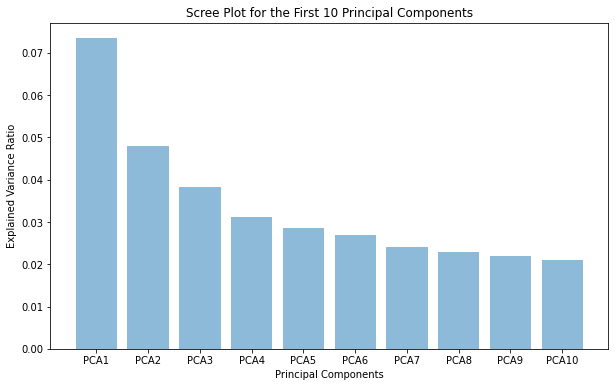

In [62]:
# Assuming pca is your PCA model
explained_variance = pca.explained_variance_ratio_[:10]

# Create a scree plot for the first 10 components with custom labels
plt.figure(figsize=(10, 6))
plt.bar([f'PCA{i+1}' for i in range(10)], explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for the First 10 Principal Components')
plt.show()

Imagine we have a dataset with multiple features like temperature (T), humidity (H), wind speed (W), and cloud cover (C). We want to simplify this data while preserving the most critical information.

1. **Data Standardization:** The first step in PCA is to standardize the data. This means we calculate the mean (μ) and standard deviation (σ) for each feature. Then, we transform each data point in every feature using this formula:

   ##### Standardized Value (Z) = (Original Value - μ) / σ 

   This step ensures that all features have the same scale, preventing one feature from dominating others due to its larger magnitude.

2. **Covariance Matrix:** Next, we compute the covariance matrix of the standardized data. This matrix shows how the features vary together. The covariance between two features, X and Y, is calculated as:

    ##### Cov(X, Y) = Σ [(X_i - μ_X) * (Y_i - μ_Y)] / (n - 1)

   Here, Σ represents summation, and n is the number of data points. The covariance matrix summarizes the relationships between all pairs of features.

3. **Eigenvalues and Eigenvectors:** Now, we find the eigenvalues (λ) and eigenvectors (v) of the covariance matrix. The eigenvalues represent the amount of variance explained by each principal component, and the eigenvectors indicate the direction of these components. We solve this equation for each component:

   ##### Covariance Matrix * v = λ * v

   The eigenvectors are normalized to have a length of 1, and they are orthogonal (perpendicular) to each other.

4. **Sorting Principal Components:** We order the eigenvalues in descending order and their corresponding eigenvectors accordingly. The eigenvector with the largest eigenvalue becomes the first principal component, the second largest becomes the second principal component, and so on.

5. **Dimension Reduction:** We can choose to keep only the top k principal components, where k is determined by the amount of variance we want to retain. For instance, if we want to retain 95% of the variance, we sum the eigenvalues until that threshold is reached and select the corresponding eigenvectors.

6. **Projection:** Finally, we project the original data onto the selected principal components to create a new dataset with reduced dimensions. The formula for projecting a data point (X) onto a principal component (v) is:

    ##### Projection (P) = X * v

   This step simplifies the data while preserving the most essential information.

##### PCA is like a mathematical process where we standardize data, compute a covariance matrix, find eigenvalues and eigenvectors, select the top principal components, and project the data onto these components.It helps us simplify complex datasets while retaining the critical patterns and relationships within the data.

In [63]:
pca.explained_variance_ratio_

array([0.07347486, 0.04805904, 0.03822758, 0.0311787 , 0.02845847,
       0.02699497, 0.02405491, 0.0229395 , 0.02187882, 0.02100963,
       0.02052433, 0.01942782, 0.01883795, 0.01875767, 0.01848749,
       0.01825798, 0.01810781, 0.01789892, 0.01744622, 0.0174182 ,
       0.01731163, 0.0172095 , 0.01698858, 0.01686371, 0.0168519 ,
       0.01655118, 0.01649129, 0.01639648, 0.01632413, 0.01620837,
       0.01610179, 0.01609067, 0.0159731 , 0.01594007, 0.01591457,
       0.01576407, 0.01562951, 0.01548418, 0.01536535, 0.01518705,
       0.01505175, 0.01490929, 0.014303  , 0.01417873, 0.01385203,
       0.01300686, 0.0118944 , 0.01179879])

In [64]:
X_train_pca, X_test_pca, y_train_a, y_test_a = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Define the best hyperparameters
best_logistic_params = {'C': 10, 'penalty': 'l2', 'solver': 'saga'}

# Intializaing the model
logistic_model = LogisticRegression(**best_logistic_params)

# Fit the model
logistic_model.fit(X_train_pca, y_train_a)

#predicting the model
y_pred = logistic_model.predict(X_test_pca)
accuracy = accuracy_score(y_test_a, y_pred)
classification_rep = classification_report(y_test_a, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8538040775733466

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4583
           1       0.73      0.62      0.67      1450

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



In [66]:
# Specify the hyperparameters for the Random Forest Classifier
rf_specific_params = {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}

# Random Forest Classifier with specific hyperparameters
rf_classifier = RandomForestClassifier(random_state=30, **rf_specific_params)
rf_classifier.fit(X_train_pca, y_train_a)

# Evaluate the Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test_a, y_pred_rf)
classification_rep_rf = classification_report(y_test_a, y_pred_rf)

# Print the accuracy and classification report for Random Forest Classifier
print("Random Forest Classifier - Accuracy:", accuracy_rf)
print("\nRandom Forest Classifier - Classification Report:\n", classification_rep_rf)

Random Forest Classifier - Accuracy: 0.836399801093983

Random Forest Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      4583
           1       0.68      0.61      0.64      1450

    accuracy                           0.84      6033
   macro avg       0.78      0.76      0.77      6033
weighted avg       0.83      0.84      0.83      6033



# ---------------------------------------------------------------------------------------------------------------

### LDA

Imagine we're dealing with weather data, trying to categorize days into "Sunny," "Cloudy," or "Rainy." We want to find a way to do this accurately based on variables like temperature, humidity, wind speed, and cloud cover.<br>
<br>
LDA is like having a weather expert guide us through this. Here's how it helps:
<br>
We have this mix of weather data, and LDA steps in to identify which combination of weather factors makes it easiest to tell the different types of days apart.<br>
<br>
Think of LDA as a filter that takes our original weather variables and transforms them into a new set of factors. These new factors are carefully chosen to make the weather categories as distinct as possible. It's like finding the best set of clues to determine if it's a sunny, cloudy, or rainy day.<br>
<br>
But LDA doesn't stop there. It also tries to keep the weather data within each category as consistent as possible. In other words, it's making sure that, for example, "Sunny" days are as similar as possible to each other in terms of the weather variables.<br>
<br>
The result is a simplified view of the weather. We might end up with fewer variables, like a single "weather score," that still capture the essence of the original data. It's like summarizing a complex weather report into a few key points.<br>
<br>
With this transformed weather data, we can now classify days more accurately. It's like having a weather forecaster who can look at these simplified measurements and confidently say, "Today is a sunny day," or "It's definitely cloudy.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

best_logistic_params_LDA = {'C': 10, 'penalty': 'l2', 'solver': 'saga'}

# Model 1: Without LDA (using Logistic Regression)
logistic_model_without_lda = LogisticRegression(**best_logistic_params_LDA)
logistic_model_without_lda.fit(X_train, y_train)
y_pred_without_lda = logistic_model_without_lda.predict(X_test)
accuracy_without_lda = accuracy_score(y_test, y_pred_without_lda)

# Model 2: With LDA (using LinearDiscriminantAnalysis + Logistic Regression)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Fit the model and
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

X_test_lda = lda.transform(X_test)

# Create a Logistic Regression model on the LDA-transformed data
logistic_model_with_lda = LogisticRegression(**best_logistic_params_LDA)
logistic_model_with_lda.fit(X_train_lda, y_train)
y_pred_with_lda = logistic_model_with_lda.predict(X_test_lda)
accuracy_with_lda = accuracy_score(y_test, y_pred_with_lda)

# Compare model accuracies
print(f"Accuracy without LDA: {accuracy_without_lda}")
print(f"Accuracy with LDA: {accuracy_with_lda}")

C:\Users\viraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy without LDA: 0.8536383225592574
Accuracy with LDA: 0.8398806563898558


In [77]:
#n_components_used = lda.n_components
#print(f"Number of LDA components used: {n_components_used}")

Number of LDA components used: None


The observed difference in accuracy between the models with and without Linear Discriminant Analysis (LDA) can be attributed to several factors.<br>
<br>
Firstly, LDA is a dimensionality reduction technique that aims to maximize the separation between classes by projecting the data into a lower-dimensional space. In the process, it may discard some information that could be relevant for classification. This reduction in the feature space can lead to a loss of discriminative power, potentially affecting the model's ability to distinguish between classes accurately.<br>
<br>
Secondly, the choice of the number of LDA components can impact model performance. If the number of components selected is not optimal, it may not capture the most discriminative information from the data, leading to suboptimal classification results.<br>
<br>
Additionally, the effectiveness of LDA can be influenced by the inherent characteristics of the dataset. LDA assumes that the data follows a Gaussian distribution, and if this assumption is not met, it may not perform as well.<br>
<br>
Lastly, the original dataset might already have features that are highly discriminative for the classification task. In such cases, applying LDA might not provide significant improvements and could even introduce noise into the data.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

rf_specific_params_lda = {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}

# Model 1: Without LDA (using RandomForestClassifier as an example)
clf_without_lda = RandomForestClassifier(**rf_specific_params_lda)
clf_without_lda.fit(X_train, y_train)
y_pred_without_lda = clf_without_lda.predict(X_test)
accuracy_without_lda = accuracy_score(y_test, y_pred_without_lda)

# Model 2: With LDA (using LinearDiscriminantAnalysis + RandomForestClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initiate the model and fit the model
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

X_test_lda = lda.transform(X_test)
#creating random classifier
clf_with_lda = RandomForestClassifier(**rf_specific_params_lda)
clf_with_lda.fit(X_train_lda, y_train)
y_pred_with_lda = clf_with_lda.predict(X_test_lda)
accuracy_with_lda = accuracy_score(y_test, y_pred_with_lda)

# Compare model accuracies
print(f"Accuracy without LDA: {accuracy_without_lda}")
print(f"Accuracy with LDA: {accuracy_with_lda}")

Accuracy without LDA: 0.8615945632355378
Accuracy with LDA: 0.8279462953754351


***Model Evaluation and Dimensionality Reduction<br>***
<br>
In the course of our analysis, we encountered an important reminder from the renowned statistician George Box:<b> "All models are wrong, but some are useful."</b> This quote underscores the significance of simplicity and practicality in modeling. While no model can perfectly replicate the complexity of real-world data, simplicity often enhances interpretability and usability, ultimately leading to more useful models.<br>
<br>
Logistic Regression with PCA:
<br>
In our investigation, we applied logistic regression both with and without Principal Component Analysis (PCA). The results revealed that logistic regression, as a relatively simple model, performed reasonably well even without dimensionality reduction. The model achieved a cross-validation best score of <b>0.8468</b> and a test set accuracy of <b>0.8536</b> without PCA. Introducing PCA into the logistic regression pipeline marginally improved accuracy, resulting in an accuracy of approximately<b> 0.8538</b>. These results suggest that, in the context of logistic regression, dimensionality reduction through PCA did not significantly enhance predictive performance.<br>
<br>
Random Forest Classifier:
<br>
When we transitioned to the Random Forest Classifier, a more complex model, the results presented an intriguing contrast. Random Forest performed relatively well without PCA, achieving an accuracy of <b>0.8626.</b> However, when PCA was applied, the accuracy slightly decreased to<b> 0.8364</b>. This outcome implies that, for a complex model like Random Forest, the dimensionality reduction facilitated by PCA may not be as advantageous as it is for simpler models like logistic regression. In this case, not employing PCA led to superior predictive performance.

The choice of whether to use PCA or not depends on the specific machine learning algorithm being used and the dataset characteristics. In the case of logistic regression, both with and without PCA, yield similar accuracy. However, for the Random Forest Classifier, avoiding PCA leads to better predictive performance. Therefore, it's essential to consider the nature of your data and the machine learning algorithm you're using when deciding whether dimensionality reduction techniques like PCA are beneficial.